# Problem Statement

## Introduction

This assignment is a programming assignment wherein you have to build a multiple linear regression model for the prediction of demand for shared bikes. You will need to submit a Jupyter notebook for the same. 

## Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 



## Business Goal:

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

In [1]:
# importing warning library in order to suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing all the necessary libraries that we will be using in this assignment going forward
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
bs_df = pd.read_csv("day.csv")
bs_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### I am going to follow the EDA path till the visualisation before we divide our train and test datasets for my MLR model.

In [4]:
#Checking the shape of the dataframe
bs_df.shape

(730, 16)

In [5]:
#Checking the statistical information of the dataframe
bs_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


This suggests every column in the dataframe is a numerical column except the date column i.e. "dteday".

In [6]:
# lets get some information about the columns present in the data
bs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


This suggests our dataframe has no null values. So, we can proceed with our further steps.

In [7]:
#Checking if the data is having complete duplicate rows or not. If Yes, then how many?
bs_df.duplicated().sum()

0

In [8]:
#Lets check the same for our record index column "instant" as well if there is any duplicate entry.
bs_df.duplicated(subset = 'instant').sum()

0

This means there is no duplicate entry in the dataframe.

In [9]:
# Droping instant column as it is the index column which has nothing to do with the target column.
bs_df.drop(['instant'], axis = 1, inplace = True)

# Dropping dteday column as we already have month and weekday columns to work with
bs_df.drop(['dteday'], axis = 1, inplace = True)

# Dropping "casual" and "registered" columns as our target variable "cnt" column is the sum of both the columns.
bs_df.drop(['casual'], axis = 1, inplace = True)
bs_df.drop(['registered'], axis = 1, inplace = True)

In [10]:
bs_df.shape

(730, 12)

In [11]:
bs_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Now I'm going to map few columns (weekday, mnth, weathersit, season) as per the right set of values given in the data dictionary.

In [12]:
#mapping the weekday column
bs_df.weekday = bs_df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
#mapping the mnth column
bs_df.mnth = bs_df.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
#mapping the weathersit column
bs_df.weathersit = bs_df.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})
#mapping the season column
bs_df.season = bs_df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [13]:
#lets have a look at the dataset after mapping the right values to the above set of columns.
bs_df.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,jan,0,sat,0,Clear,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,jan,0,sun,0,Misty,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,jan,0,mon,1,Misty,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,jan,0,tue,1,Clear,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,jan,0,wed,1,Clear,6.184153,7.54440,48.2917,14.958889,1321


### Lets check if there are any outliers present in the data in our coninuous numerical independent variables (temp, atemp, hum, and windspeed).

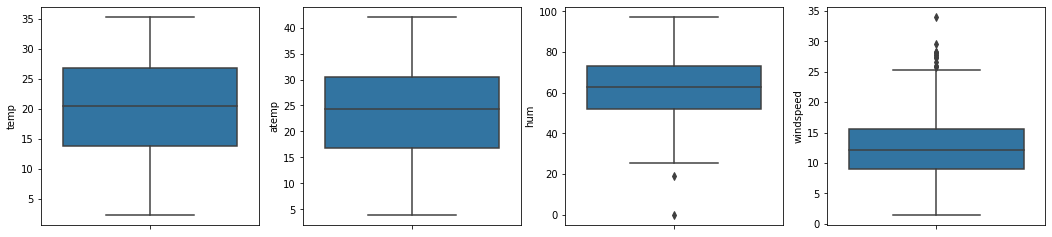

In [14]:
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))
a = 1
for i in cols:
    plt.subplot(1,4,a)
    sns.boxplot(y= i, data= bs_df)
    a = a+1

The above boxplots suggests there are no outliers that we need to handle and we good to go with the further steps.

### Lets proceed with the DATA VISUALIZATION part now.

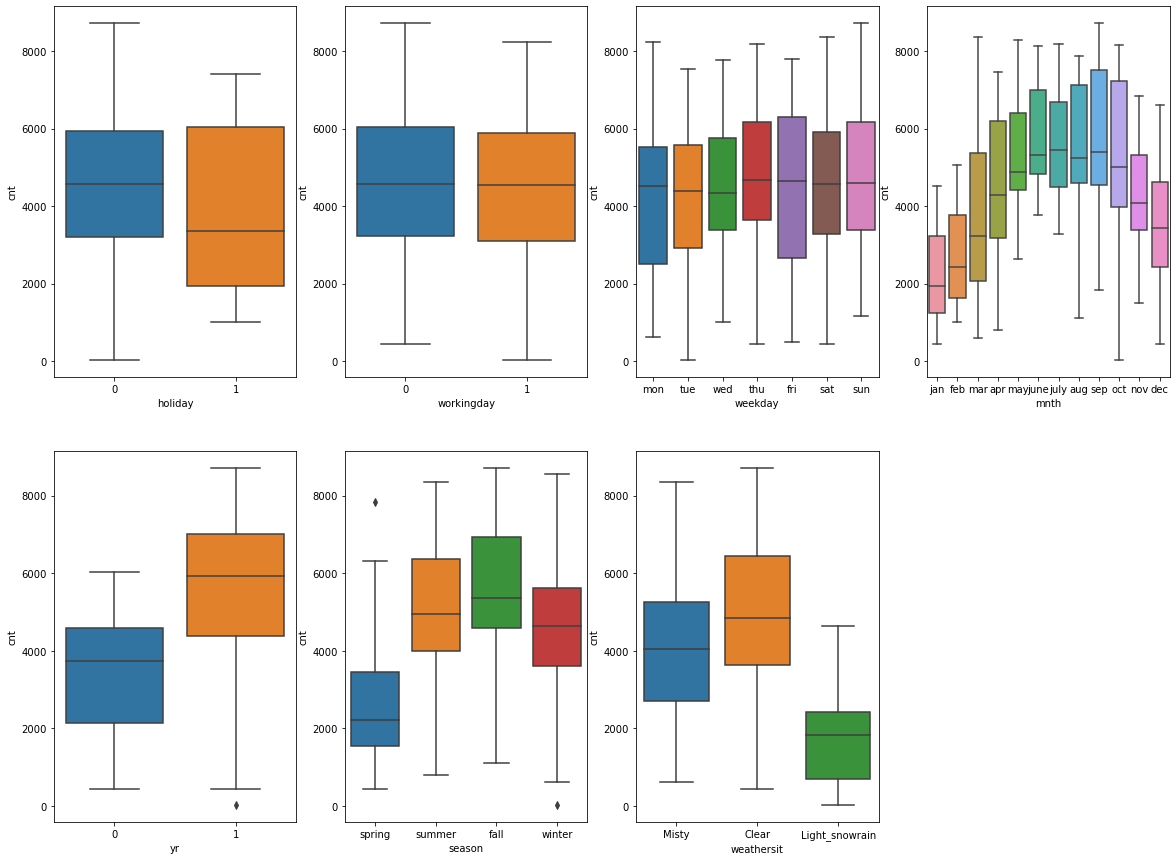

In [15]:
#visualizing the categorical columns to see how predictor variable stands against the target variable
plt.figure(figsize=(20, 15))
plt.subplot(2,4,1)
sns.boxplot(x = 'holiday', y = 'cnt', data = bs_df)
plt.subplot(2,4,2)
sns.boxplot(x = 'workingday', y = 'cnt', data = bs_df)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bs_df)
plt.subplot(2,4,4)
sns.boxplot(x = 'mnth', y = 'cnt', data = bs_df)
plt.subplot(2,4,5)
sns.boxplot(x = 'yr', y = 'cnt', data = bs_df)
plt.subplot(2,4,6)
sns.boxplot(x = 'season', y = 'cnt', data = bs_df)
plt.subplot(2,4,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bs_df)
plt.show()

Here many insights can be drawn from the plots

- "fall" season has the highest demand for rental bikes
- Demand grows in the next year which can infer that the demand progresses with each passing year (which might be due to increasing popularity of the service).
- Demand grows continuously till the "June" month. "September" has the highest demand. Beyond "September", demand shows a decreasing trend.
- During holidays, the demands are decreasing.
- Weekday doesn't give a clear picture abount the demand.
- The clear weathershit has the highest demand
- During September, the demand is high. During the year end and beginning, it decreases which might be happening because by extereme weather conditions.

<Figure size 1440x2160 with 0 Axes>

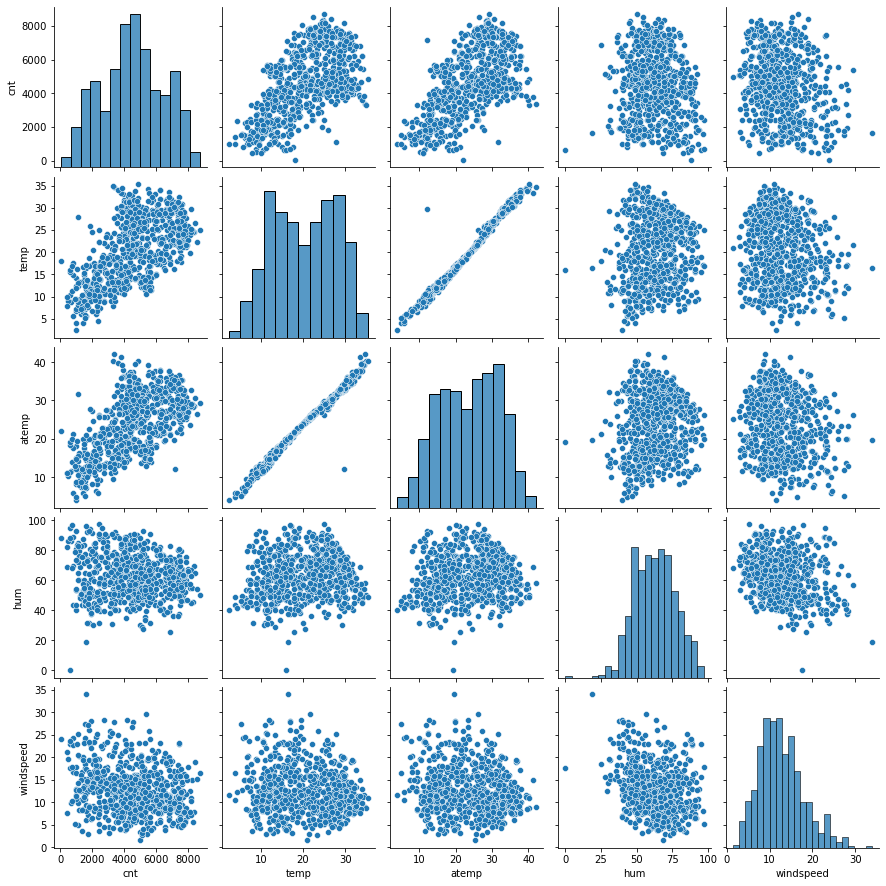

In [16]:
# lets draw pairplots for continuous numeric variables and check the linear relationship between them.
plt.figure(figsize = (20,30))
sns.pairplot(data= bs_df,vars= ['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

- This suggests that the variables "temp" and "atemp" has strong correlation with our target variable "cnt".
- Also, the variables "temp" and "atemp" are highly correlated to each other.

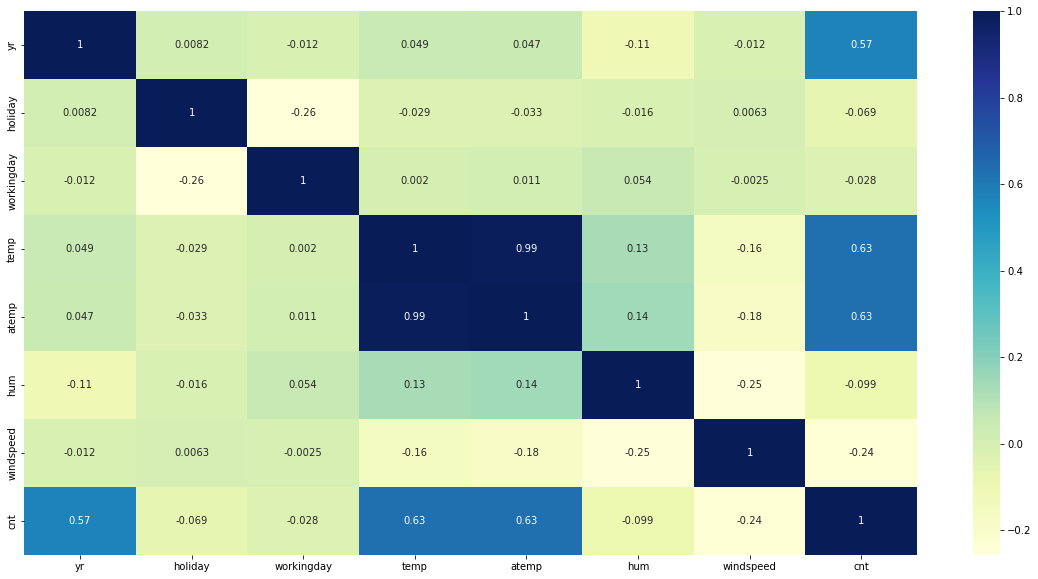

In [17]:
#Lets calculate the correlation between the variables and observe them over a heatmap
corr = bs_df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='YlGnBu' )
plt.show()

There is a linear relationship between temp and atemp. Since both the parameters cannot be used in the model due to multicolinearity, we will decide which parameters to be kept based on VIFs and p-values.

### Lets prepare the data for our Linear regression model now.

In [18]:
#Lets create dummy variables for all the categorical variables present in the dataset
months_df=pd.get_dummies(bs_df.mnth,drop_first=True)
weekdays_df=pd.get_dummies(bs_df.weekday,drop_first=True)
weathersit_df=pd.get_dummies(bs_df.weathersit,drop_first=True)
seasons_df=pd.get_dummies(bs_df.season,drop_first=True)

In [19]:
bs_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [20]:
#Merging  the dataframe, with the dummy variable dataset. 
bs_df1 = pd.concat([bs_df,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [21]:
bs_df1.head(15)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,...,0,0,0,1,0,0,1,1,0,0
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,1,0,0,1,0,0
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,...,0,0,1,0,0,0,0,1,0,0
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0
5,spring,0,jan,0,sat,0,Clear,8.378268,11.66045,51.8261,...,1,0,0,0,0,0,0,1,0,0
6,spring,0,jan,0,sun,0,Misty,8.057402,10.44195,49.8696,...,0,1,0,0,0,0,1,1,0,0
7,spring,0,jan,0,mon,1,Misty,6.765000,8.11270,53.5833,...,0,0,0,0,0,0,1,1,0,0
8,spring,0,jan,0,tue,1,Clear,5.671653,5.80875,43.4167,...,0,0,0,1,0,0,0,1,0,0
9,spring,0,jan,0,wed,1,Clear,6.184153,7.54440,48.2917,...,0,0,0,0,1,0,0,1,0,0


In [22]:
#lets check the column information again for the concatenated dataset "bs_df1"
bs_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   yr              730 non-null    int64  
 2   mnth            730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   hum             730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  aug             730 non-null    uint8  
 13  dec             730 non-null    uint8  
 14  feb             730 non-null    uint8  
 15  jan             730 non-null    uint8  
 16  july            730 non-null    uint8  
 17  june            730 non-null    uin

Since we concatenated the new datasets (having dummy variables) to the old dataset, we can see the (mnth, season, weekday and weathersit) columns are yet to be dropped from the new dataset "bs_df1".

In [23]:
#Lets drop the above columns now
bs_df1.drop(['mnth','season','weekday','weathersit'], axis = 1, inplace = True)

In [24]:
#Checking if those 4 columns are successfully dropped
bs_df1.shape

(730, 30)

In [25]:
pd.set_option('display.max_columns', None)
bs_df1.head(15)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0,0,0,8.378268,11.66045,51.8261,6.000868,1606,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
6,0,0,0,8.057402,10.44195,49.8696,11.304642,1510,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
7,0,0,1,6.765000,8.11270,53.5833,17.875868,959,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0
8,0,0,1,5.671653,5.80875,43.4167,24.250650,822,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
9,0,0,1,6.184153,7.54440,48.2917,14.958889,1321,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


Since we can see all our columns have numerical values now, lets proceed and separate the train and test dataset.

In [26]:
#Splittng the dataset into train and test
np.random.seed(0)
df_train, df_test = train_test_split(bs_df1, train_size = 0.7, random_state = 100)

In [27]:
df_train.shape

(510, 30)

In [28]:
df_test.shape

(220, 30)

In [29]:
#Using MinMaxScaler to rescale the variables from train dataset which consists high numerical values 
#(typically the ones which has values>1) and those columns are: temp,atemp,hum,windspeed and cnt)
scaler = MinMaxScaler()

In [30]:
num_vars = ['temp','atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [31]:
df_train.head(10)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
580,1,0,0,0.914852,0.882350,0.632030,0.462538,0.782559,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
500,1,0,1,0.719639,0.678508,0.719193,0.172431,0.851588,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
479,1,0,1,0.520271,0.513565,0.440962,0.164434,0.710308,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
472,1,0,1,0.503656,0.496135,0.586518,0.270032,0.499885,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
455,1,0,1,0.456929,0.443956,0.696865,0.279394,0.692476,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0


In [32]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We have been able to validate the scaling we did since max value in each of the variable is "1.00".

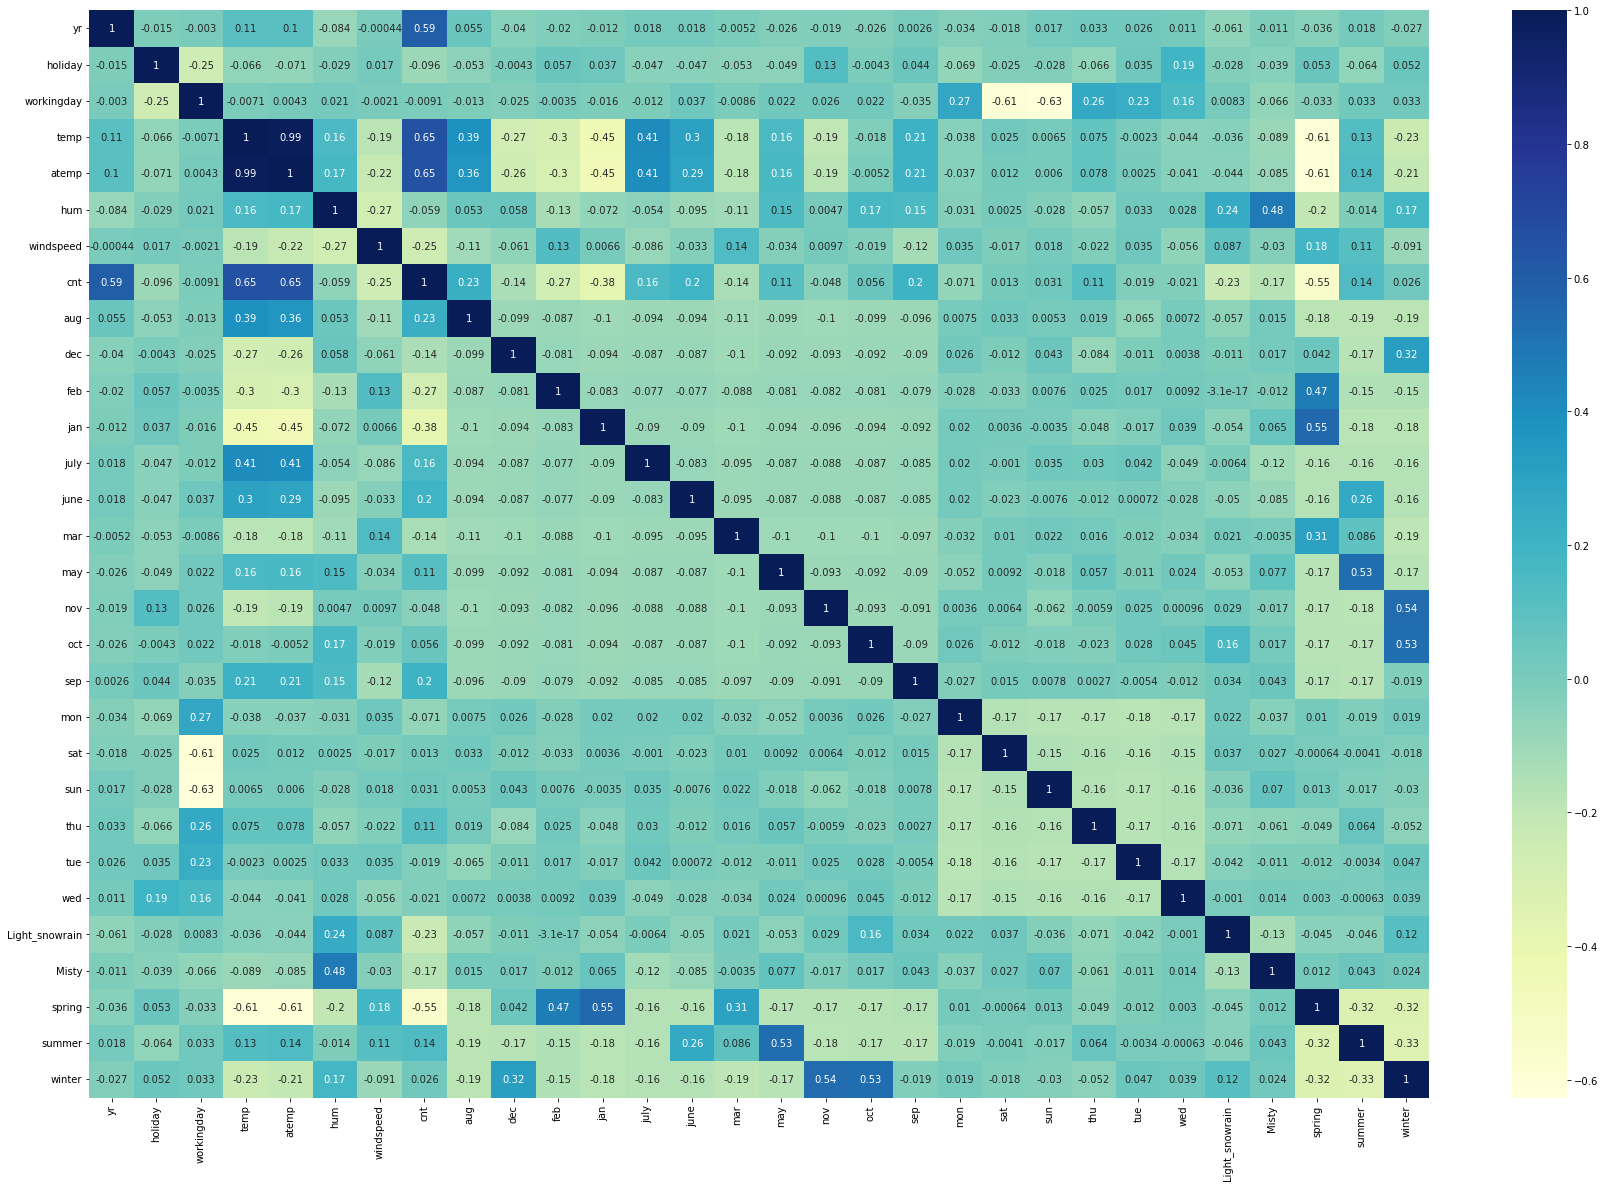

In [33]:
#Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (30, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

- "yr" and "temp/atemp" columns seems to have the highest positive correlation with our target variable "cnt".
- Also, Spring season with Jan and Feb months shows a high negative correlation.

Lets have a look at the trend of our target variable "cnt" w.r.t. the continuous variable "temp" using scatter plot.

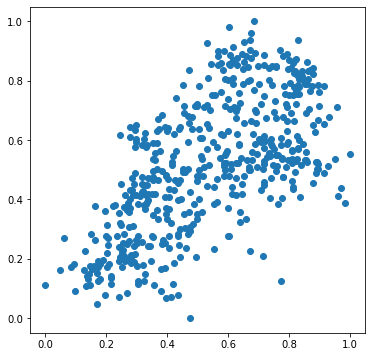

In [34]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

##### Dividing into X and Y sets for the model building

In [35]:
y_train = df_train.pop('cnt')
X_train = df_train

##### Building the Linear Model

In [36]:
#Using Recursive feature elimination (RFE) for automated feature(variable) elimination

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [37]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 10),
 ('dec', True, 1),
 ('feb', False, 2),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 12),
 ('mar', False, 15),
 ('may', False, 9),
 ('nov', True, 1),
 ('oct', False, 13),
 ('sep', True, 1),
 ('mon', False, 8),
 ('sat', False, 5),
 ('sun', False, 6),
 ('thu', False, 14),
 ('tue', False, 7),
 ('wed', False, 11),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [38]:
#Lets store the selected list of column using RFE in a variable
col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'dec', 'jan', 'july',
       'nov', 'sep', 'Light_snowrain', 'Misty', 'spring', 'summer', 'winter'],
      dtype='object')


In [39]:
#list of columns those were eliminated using RFE method
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'aug', 'feb', 'june', 'mar', 'may', 'oct', 'mon',
       'sat', 'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [40]:
#Creating a dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [41]:
# Adding a constant variable  
X_train_rfe = sm.add_constant(X_train_rfe)

In [42]:
#Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()

In [43]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Tue, 04 Oct 2022   Prob (F-statistic):          8.15e-189
Time:                        20:44:07   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3197      0.036      8.

In [44]:
# Generic function to calculate VIF of variables

def calculate_VIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [45]:
#Again creating the same dataframe with RFE selected variables since, we added a constant after that
X_train_rfe = X_train[col]

In [46]:
#calculating VIF

calculate_VIF(X_train_rfe)

,Features,VIF
3,hum,30.89
2,temp,17.79
4,windspeed,4.72
12,spring,4.37
14,winter,4.06
13,summer,2.82
11,Misty,2.32
0,yr,2.09
8,nov,1.85
6,jan,1.75


Since "hum" variable has the highest VIF, lets drop it first.

In [47]:
X_train_rfe = X_train_rfe.drop(['hum'], axis = 1)

In [48]:
calculate_VIF(X_train_rfe)

,Features,VIF
2,temp,5.17
3,windspeed,4.67
13,winter,2.95
11,spring,2.89
12,summer,2.24
0,yr,2.07
7,nov,1.81
5,jan,1.66
6,july,1.59
10,Misty,1.57


VIF values seems to be good. However, lets see if we can reduce further.

In [49]:
#Building 2nd LR model
X_train_lm2 = sm.add_constant(X_train_rfe)
lm2 = sm.OLS(y_train,X_train_lm2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Tue, 04 Oct 2022   Prob (F-statistic):          4.75e-186
Time:                        20:44:07   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2450      0.032      7.

Lets drop "nov" column since it has the highest p-value amongst the columns above.

In [50]:
#We can drop nov variable as it has high p-value
X_train_rfe1 = X_train_rfe.drop(['nov'], axis = 1)

#Running the function to calculate VIF for the new model
calculate_VIF(X_train_rfe1)

,Features,VIF
2,temp,5.14
3,windspeed,4.62
10,spring,2.89
11,summer,2.24
0,yr,2.07
12,winter,2.05
5,jan,1.65
6,july,1.59
9,Misty,1.57
7,sep,1.34


This doesn't seem to have affected the VIF values very much. Lets build one more model.

In [51]:
#Building 3rd LR model
X_train_lm3 = sm.add_constant(X_train_rfe1)
lm3 = sm.OLS(y_train,X_train_lm3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.0
Date:                Tue, 04 Oct 2022   Prob (F-statistic):          2.74e-186
Time:                        20:44:07   Log-Likelihood:                 502.67
No. Observations:                 510   AIC:                            -977.3
Df Residuals:                     496   BIC:                            -918.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2283      0.031      7.

Lets drop "dec" column since it has the highest p-value amongst the columns above.

In [52]:
#We can drop dec variable as it has high p-value
X_train_rfe1 = X_train_rfe1.drop(['dec'], axis = 1)

#Running the function to calculate VIF for the new model
calculate_VIF(X_train_rfe1)

,Features,VIF
2,temp,5.13
3,windspeed,4.62
9,spring,2.75
10,summer,2.24
0,yr,2.07
11,winter,1.78
4,jan,1.61
5,july,1.59
8,Misty,1.56
6,sep,1.34


Again, this doesn't affected the VIF values much. Lets build one more model.

In [53]:
#Building 4th LR model
X_train_lm4 = sm.add_constant(X_train_rfe1)
lm4 = sm.OLS(y_train,X_train_lm4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Tue, 04 Oct 2022   Prob (F-statistic):          8.14e-187
Time:                        20:44:07   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2154      0.030      7.

Lets drop "jan" column since it has the highest p-value amongst the columns above.

In [54]:
#We can drop jan variable as it has high p-value
X_train_rfe1 = X_train_rfe1.drop(['jan'], axis = 1)

#Running the function to calculate VIF for the new model
calculate_VIF(X_train_rfe1)

,Features,VIF
2,temp,5.09
3,windspeed,4.60
9,summer,2.23
8,spring,2.08
0,yr,2.07
10,winter,1.78
4,july,1.58
7,Misty,1.55
5,sep,1.34
6,Light_snowrain,1.08


Again, this doesn't affected the VIF values much. Lets build one more model.

In [55]:
#Building 5th LR model
X_train_lm5 = sm.add_constant(X_train_rfe1)
lm5 = sm.OLS(y_train,X_train_lm5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Tue, 04 Oct 2022   Prob (F-statistic):          5.06e-187
Time:                        20:44:07   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1994      0.030      6.

Lets try dropping "july" column since it has the highest p-value amongst the columns above.

In [56]:
#Dropping "july" column as it has the highest p-value
X_train_rfe1 = X_train_rfe1.drop(['july'], axis = 1)

#Running the function to calculate VIF for the new model
calculate_VIF(X_train_rfe1)

,Features,VIF
3,windspeed,4.60
2,temp,3.84
0,yr,2.07
7,spring,1.99
8,summer,1.90
9,winter,1.63
6,Misty,1.55
4,sep,1.23
5,Light_snowrain,1.08
1,holiday,1.04


##### Now, we have our perfect set of columns with VIF values well under the permissible range. Lets build one more model and ensure that doesn't affect our p-value for the coefficients.

In [57]:
#Building 6th LR model
X_train_lm6 = sm.add_constant(X_train_rfe1)
lm6 = sm.OLS(y_train,X_train_lm6).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Tue, 04 Oct 2022   Prob (F-statistic):          1.47e-186
Time:                        20:44:07   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1909      0.030      6.

##### We can cosider the above model i.e lm6 as our final model since, it seems to have very low multicolinearity between the predictors and the p-values for all the predictors seems to be significant.
##### Also, F-Statistic's value of 248.4 and the p-value of 1.47e-186 i.e almost equals to zero, states that the overall model is significant.

### Residual Analysis of the train data and validation

In [58]:
X_train_lm6.head()

,const,yr,holiday,temp,windspeed,sep,Light_snowrain,Misty,spring,summer,winter
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,1,1,0,0
728,1.0,1,0,0.245101,0.663106,0,0,0,1,0,0
482,1.0,1,0,0.395666,0.188475,0,0,1,0,1,0
111,1.0,0,0,0.345824,0.380981,0,0,1,0,1,0


In [59]:
y_train_pred = lm6.predict(X_train_lm6)

Text(0.5, 0, 'Errors')

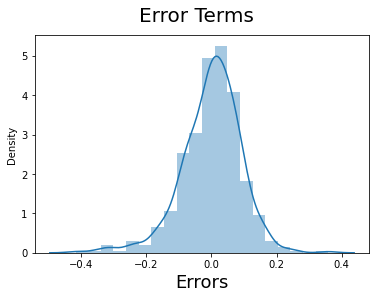

In [60]:
# Plotting the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

Error terms do seem to be following the normal distribution.

##### Lets check the multi-collinearity between the selected variables using a heatmap.

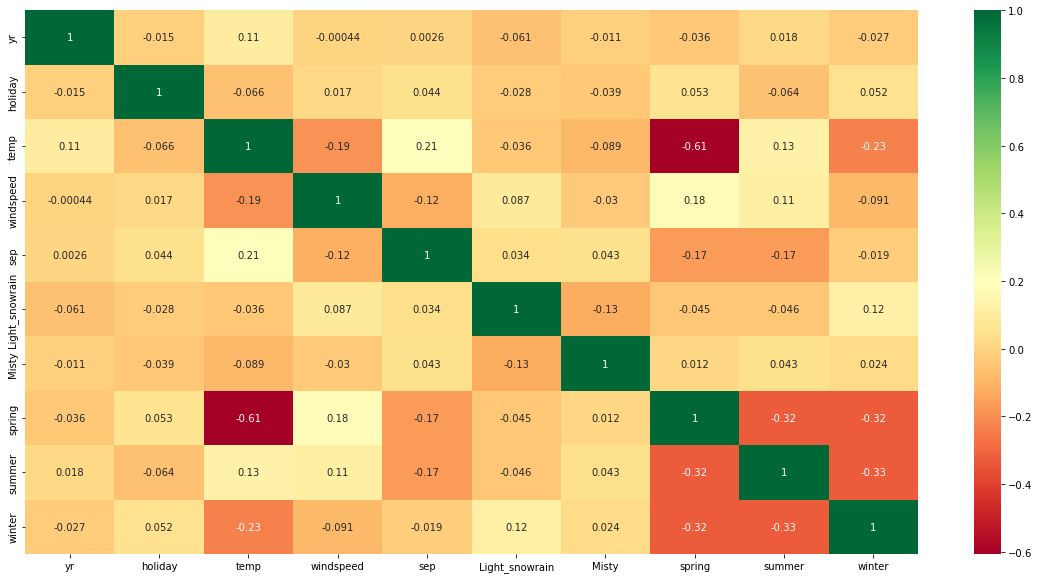

In [61]:
plt.figure(figsize=(20,10))
sns.heatmap(X_train_rfe1.corr(),annot = True, cmap="RdYlGn")
plt.show()

There doesn't seem to be any multicolinearity as observed over the heatmap.

##### Lets check the homoscedasticity

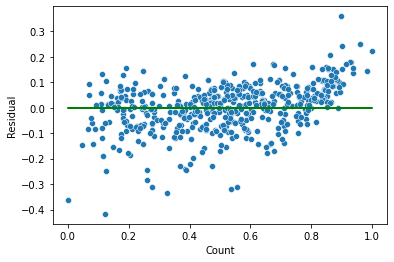

In [62]:
y_train_pred = lm6.predict(X_train_lm6)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), 'g-')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

No visible pattern observed for residuals over plot above.

##### Independence of residuals
Durbin-Watson's value of final model lm6 is 2.085, which signifies there is no first-order autocorrelation since the value lies very near to 2.00.

### Making Predictions Using the Final LR Model i.e. lm6

Since we have fitted the model and did the normal distribution check for error terms, lets make the prediction using the final model.

##### Applying the scaling on the test set

In [63]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


##### Dividing into X_test and y_test

In [64]:
y_test = df_test.pop('cnt')
X_test = df_test

In [65]:
X_test = X_test[X_train_rfe1.columns]

# Adding constant variable to test dataframe
X_test_lm6 = sm.add_constant(X_test)

In [66]:
y_pred = lm6.predict(X_test_lm6)

In [67]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8038

### Model Evaluation

Text(0, 0.5, 'y_pred')

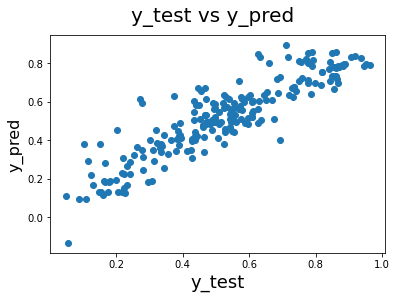

In [68]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [69]:
round(lm6.params,4)

const             0.1909
yr                0.2341
holiday          -0.0963
temp              0.4777
windspeed        -0.1481
sep               0.0910
Light_snowrain   -0.2850
Misty            -0.0787
spring           -0.0554
summer            0.0621
winter            0.0945
dtype: float64

Therefore, we can infer the equation of best fitted line as:

$ cnt = 0.1909 + 0.2341 \times yr - 0.0963 \times holiday + 0.4777 \times temp - 0.1481 \times windspeed + 0.0910 \times sep - 0.2850 \times Light_snowrain - 0.0787 \times Misty - 0.0554 \times spring + 0.0621 \times summer + 0.0945 \times winter $

In [70]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7944


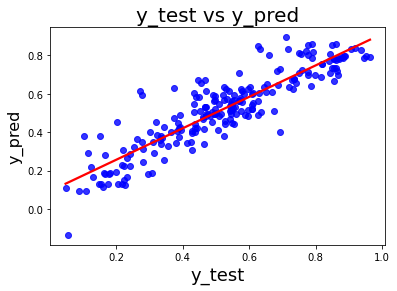

In [71]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, fit_reg=True, ci= None, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)     # Plot heading 
plt.xlabel('y_test', fontsize=18)              # x-label
plt.ylabel('y_pred', fontsize=16)              # x-label
plt.show()

### Comparision between Training and Testing dataset:

- Train dataset R^2          : 0.833
- Test dataset R^2           : 0.8038
- Train dataset Adjusted R^2 : 0.829    
- Test dataset Adjusted R^2  : 0.7944